<a href="https://colab.research.google.com/github/sheraphineshovan/Data_Science_Miniprojects/blob/main/Spam_vs_Ham_%5BNLP%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Load the data and the libraries
2. Data Preparation and Data Transformation
    - Convert all the text into Lowercase
    - Remove all the special characters
    - Remove all the stop words
    - Lemmatization and Stemming
3. Vectorization
4. TFIDF Vectorizer
5. Machine Learning and also Deep Learning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('spam.csv', encoding = 'latin-1')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df['v2']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [ ]:
dff = df.loc[:,['v1','v2']]

In [ ]:
dff['v2']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<Axes: >

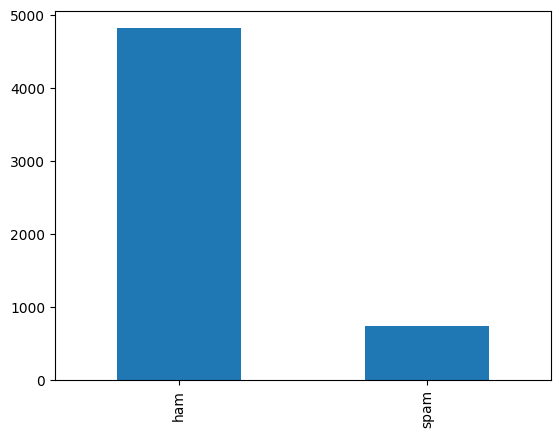

In [ ]:
dff['v1'].value_counts().plot(kind='bar')

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re

In [ ]:
from nltk.corpus import stopwords

In [ ]:
print(stopwords.words('english'))

LookupError: ignored

In [ ]:
nltk.download('stopwords')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
nltk.download('wordnet')
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
dff['v2'] = dff['v2'].map(lambda s:preprocess(s))

In [ ]:
dff['v1']

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object

In [ ]:
dff['v2']

0       jurong point crazy available bugis great world...
1                                      lar joking wif oni
2       free entry wkly comp win cup final tkts may te...
3                           dun say early hor already say
4                  nah think goes usf lives around though
                              ...                        
5567    time tried contact pound prize claim easy call...
5568                                 going esplanade home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: v2, Length: 5572, dtype: object

Vectorize the Text(can do preprocessing)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vect = TfidfVectorizer()

In [ ]:
x = vect.fit_transform(dff['v2'])

In [ ]:
x.shape

(5572, 7386)

In [ ]:
type(x)

scipy.sparse._csr.csr_matrix

In [ ]:
le = LabelEncoder()

In [ ]:
y = le.fit_transform(dff['v1'])

Split the data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 123)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4457, 7386)
(4457,)
(1115, 7386)
(1115,)


Randomizercv and gridsearchcv are used to get the perfect hyperparameters

In [ ]:
random_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
clf = RandomizedSearchCV(estimator = rf,param_distributions=random_grid,verbose = 2,random_state=123)

In [ ]:
search = clf.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=log_loss, max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=230; total time=   4.0s
[CV] END criterion=log_loss, max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=230; total time=   4.6s
[CV] END criterion=log_loss, max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=230; total time=   3.6s
[CV] END criterion=log_loss, max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=230; total time=   3.8s
[CV] END criterion=log_loss, max_depth=50, min_samples_leaf=1, min_samples_split=5, n_estimators=230; total time=   4.5s
[CV] END criterion=log_loss, max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=180; total time=   4.8s
[CV] END criterion=log_loss, max_depth=100, min_samples_leaf=1, min_samples_split=2, n_estimators=180; total time=   4.9s
[CV] END criterion=log_loss, max_depth=100, min_samples_leaf=1, min_samples_split=2, n_est

In [ ]:
search.best_params_

{'n_estimators': 130,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': None,
 'criterion': 'gini'}

In [ ]:
search.best_score_

0.9786834463217124

NB Classifier

In [ ]:
nb = GaussianNB()

In [ ]:
x_arr= np.array(x_train)

In [ ]:
nb.fit(x_train.toarray(),y_train)
nb_preds_train = nb.predict(x_train.toarray())
nb_preds_test = nb.predict(x_test.toarray())


In [ ]:
print('Accuracy score of the model is: ', round(accuracy_score(y_train, nb_preds_train),2))
print('Accuracy score of the model is: ', round(accuracy_score(y_test, nb_preds_test),2))

Accuracy score of the model is:  0.93
Accuracy score of the model is:  0.88


In [ ]:
rf = RandomForestClassifier(n_estimators=130,
 min_samples_split=10,
 min_samples_leaf = 1,
 max_depth= None,
criterion= 'gini')

In [ ]:
rf.fit(x_train.toarray(),y_train)
rf_preds_train = rf.predict(x_train.toarray())
rf_preds_test = rf.predict(x_test.toarray())

In [ ]:
print('Accuracy score of the model is: ', round(accuracy_score(y_train, rf_preds_train),2))
print('Accuracy score of the model is: ', round(accuracy_score(y_test, rf_preds_test),2))

Accuracy score of the model is:  1.0
Accuracy score of the model is:  0.98
